In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [52]:
sonar = pd.read_csv(r"..\Cases\Sonar\Sonar.csv")
# y = sonar['Class']
le = LabelEncoder()
y = le.fit_transform(sonar['Class'])
X = sonar.drop('Class', axis=1)
print(le.classes_)

['M' 'R']


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=12,stratify=y)

In [54]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred_prob = lr.predict_proba(X_test)

In [55]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[26  8]
 [ 7 22]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.78        34
           1       0.73      0.76      0.75        29

    accuracy                           0.76        63
   macro avg       0.76      0.76      0.76        63
weighted avg       0.76      0.76      0.76        63

0.7619047619047619


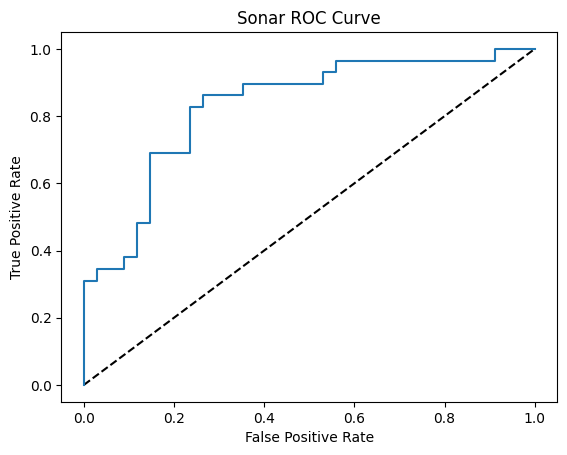

0.8306288032454362


In [56]:
# ROC
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities: y_pred_prob
y_probs = lr.predict_proba(X_test)
y_pred_prob = y_probs[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Sonar ROC Curve')
plt.show()

print(roc_auc_score(y_test, y_pred_prob))
